In [1]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read the csv file russian demographics.csv file from the directory
readfile_df = pd.read_csv("russiandemography/russian_demography.csv")
readfile_df.head()

,year,region,npg,birth_rate,death_rate,migratory_growth,population
0,1990,Republic of Adygea,1.9,14.2,12.3,NaN,434788.0
1,1990,Altai Krai,1.8,12.9,11.1,NaN,2640419.0
2,1990,Amur Oblast,7.6,16.2,8.6,NaN,1055337.0
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,NaN,1523509.0
4,1990,Astrakhan Oblast,4.7,15.1,10.4,NaN,997516.0


In [3]:
#Get info about the file and the datatypes
readfile_df.dtypes

year                  int64
region               object
npg                 float64
birth_rate          float64
death_rate          float64
migratory_growth    float64
population          float64
dtype: object

In [4]:
# get counts of how many regions are present in the file
readfile_df['region'].value_counts()

Vladimir Oblast       28
Novgorod Oblast       28
Novosibirsk Oblast    28
Murmansk Oblast       28
Perm Krai             28
                      ..
Vologda Oblast        28
Komi Republic         28
Leningrad Oblast      28
Pskov Oblast          28
Tula Oblast           28
Name: region, Length: 85, dtype: int64

In [5]:
readfile_df.head()

,year,region,npg,birth_rate,death_rate,migratory_growth,population
0,1990,Republic of Adygea,1.9,14.2,12.3,NaN,434788.0
1,1990,Altai Krai,1.8,12.9,11.1,NaN,2640419.0
2,1990,Amur Oblast,7.6,16.2,8.6,NaN,1055337.0
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,NaN,1523509.0
4,1990,Astrakhan Oblast,4.7,15.1,10.4,NaN,997516.0


In [6]:
#dataframe to get the mean 

readfile_mean = readfile_df.groupby(["year"]).agg({"birth_rate":'mean'})

# Convert to DataFrame
readfile_mean_df = pd.DataFrame(readfile_mean)

# Preview DataFrame 
readfile_mean_df.head()

,birth_rate
year,
1990,14.354878
1991,12.971951
1992,11.479268
1993,10.046914
1994,10.228395


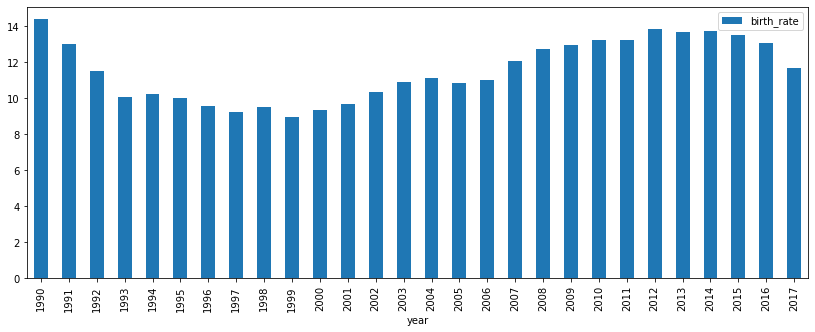

In [7]:
# Bar plot based on year and birth rate
readfile_df.groupby('year').agg({'birth_rate': 'mean'}).plot.bar(figsize=(14,5))
plt.show()

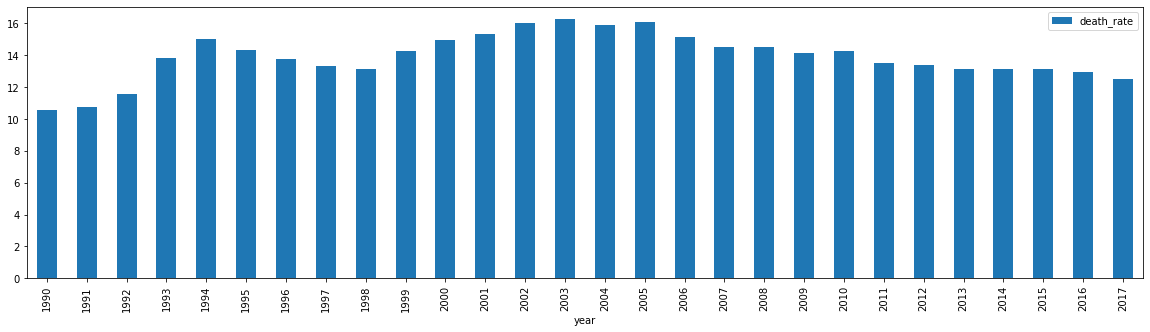

In [8]:
# Bar plot based on region and death rate
readfile_df.groupby(['year']).agg({'death_rate': 'mean'}).plot.bar(figsize=(20,5))
plt.show()

In [9]:
readfile_df["difference"] = readfile_df["birth_rate"]-readfile_df["death_rate"]
readfile_df["difference"]

0       1.9
1       1.8
2       7.6
3       3.7
4       4.7
       ... 
2375   -1.3
2376    3.7
2377    6.4
2378    9.1
2379   -4.7
Name: difference, Length: 2380, dtype: float64

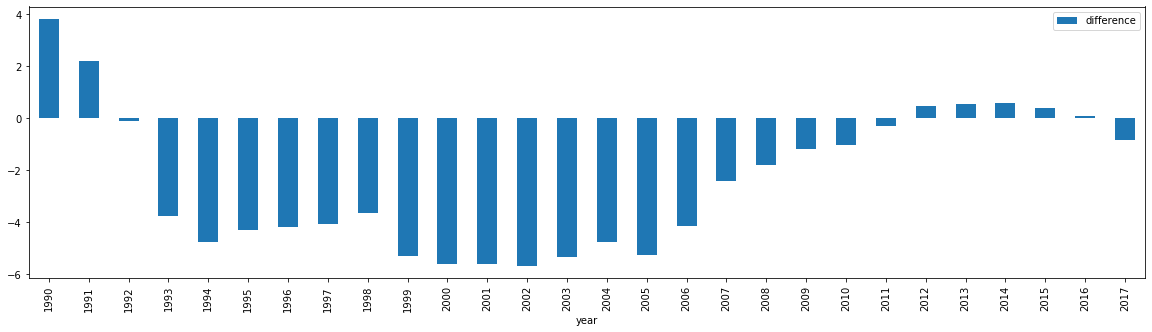

In [10]:
# plotting the difference to get the population increase or decrease over the years
readfile_df.groupby(['year']).agg({'difference': 'mean'}).plot.bar(figsize=(20,5))
plt.show()

In [11]:
# the above plotting shows the trend. The population is on the increase during the year 1990 but it started to decrease 
#in 1991 and 1992.It started to grow in the negative from 1993 to 2011. in 2012 it started to increase but started to
#decrease in 2017.
readfile_df.head()

,year,region,npg,birth_rate,death_rate,migratory_growth,population,difference
0,1990,Republic of Adygea,1.9,14.2,12.3,NaN,434788.0,1.9
1,1990,Altai Krai,1.8,12.9,11.1,NaN,2640419.0,1.8
2,1990,Amur Oblast,7.6,16.2,8.6,NaN,1055337.0,7.6
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,NaN,1523509.0,3.7
4,1990,Astrakhan Oblast,4.7,15.1,10.4,NaN,997516.0,4.7


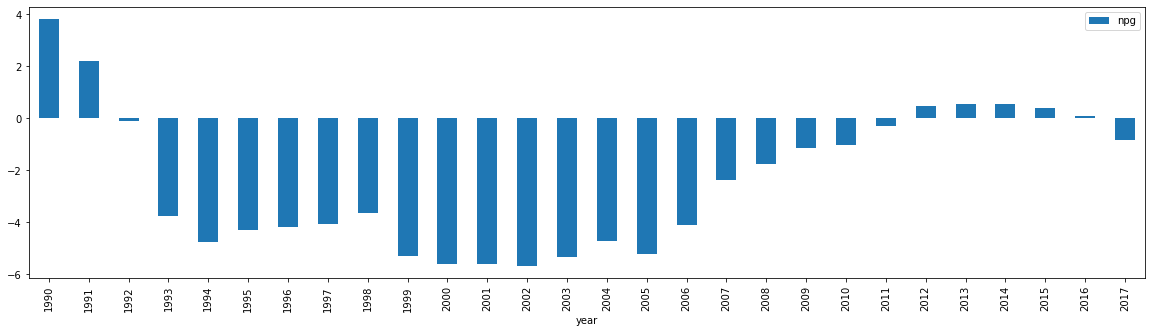

In [12]:
#check the natural population growth per 1000 people
readfile_df.groupby(['year']).agg({'npg': 'mean'}).plot.bar(figsize=(20,5))
plt.show()

In [13]:
# the above graph shows the trend of npg over the years. it looks similar to that of difference in the above graph.

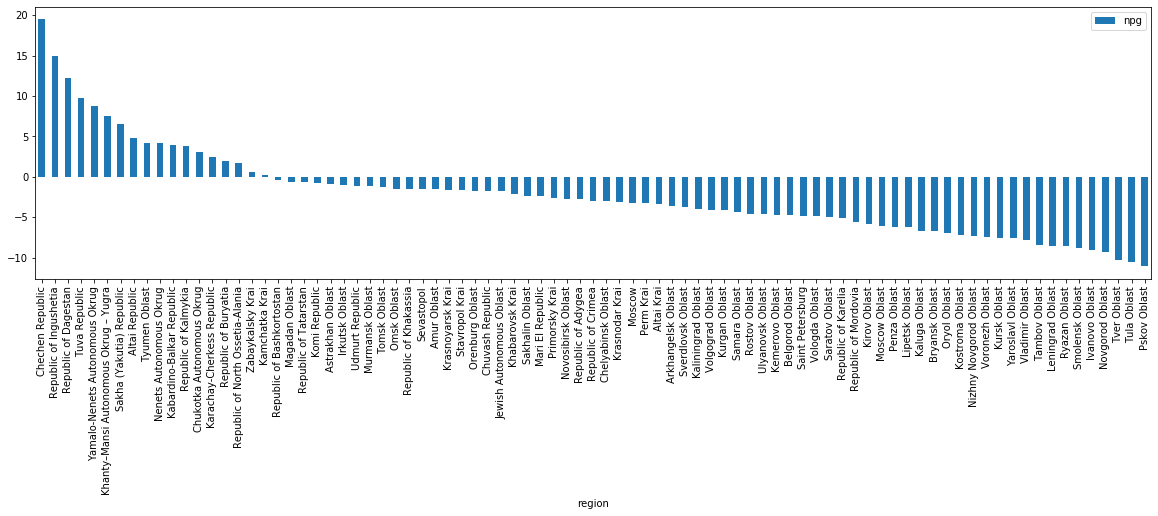

In [14]:
#Create a bar chart analysis based on npg and region and sort based on npg to understand how the trend is over the region
readfile_df.groupby(['region']).agg({'npg': 'mean'}).sort_values(by='npg',ascending=False).plot.bar(figsize=(20,5))
plt.show()

In [15]:
# the above graph shows the max npg is on chechen Republic and the least is at Pskov Oblast.There is no considerable
#change in the npg for the region kamchatka krai. 

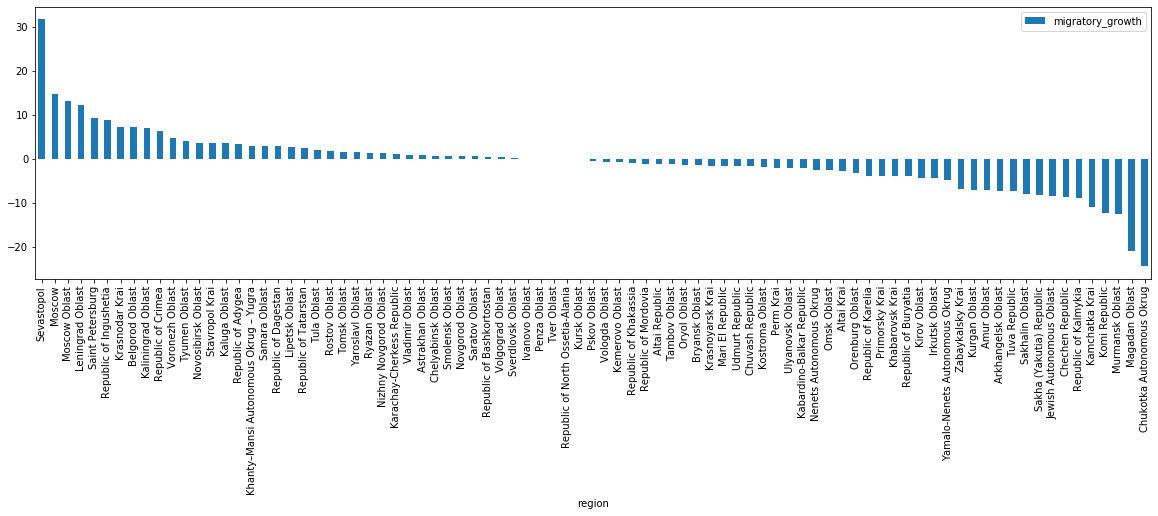

In [37]:
# lets do migratory growth to analyse
readfile_df.groupby(['region']).agg({'migratory_growth': 'mean'}).sort_values(by='migratory_growth',ascending=False).plot.bar(figsize=(20,5))
plt.show()

In [39]:
# the migratory growth graph shows that there is no migration happened or neglible on few regions or it could also mean
# the file has null values. 



In [16]:
# updated dataframe with the difference
readfile_df.head()

,year,region,npg,birth_rate,death_rate,migratory_growth,population,difference
0,1990,Republic of Adygea,1.9,14.2,12.3,NaN,434788.0,1.9
1,1990,Altai Krai,1.8,12.9,11.1,NaN,2640419.0,1.8
2,1990,Amur Oblast,7.6,16.2,8.6,NaN,1055337.0,7.6
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,NaN,1523509.0,3.7
4,1990,Astrakhan Oblast,4.7,15.1,10.4,NaN,997516.0,4.7


In [17]:
# get top 10 regions with most population
top10regionpopulation = readfile_df.groupby('region').agg({'population': 'sum'}).sort_values(by="population",ascending=False)[:10]
arraytop10regionpopulation = top10regionpopulation.index.values
arraytop10regionpopulation

array(['Moscow', 'Krasnodar Krai', 'Moscow Oblast', 'Rostov Oblast',
       'Krasnoyarsk Krai', 'Sverdlovsk Oblast', 'Saint Petersburg',
       'Samara Oblast', 'Republic of Bashkortostan',
       'Republic of Tatarstan'], dtype=object)

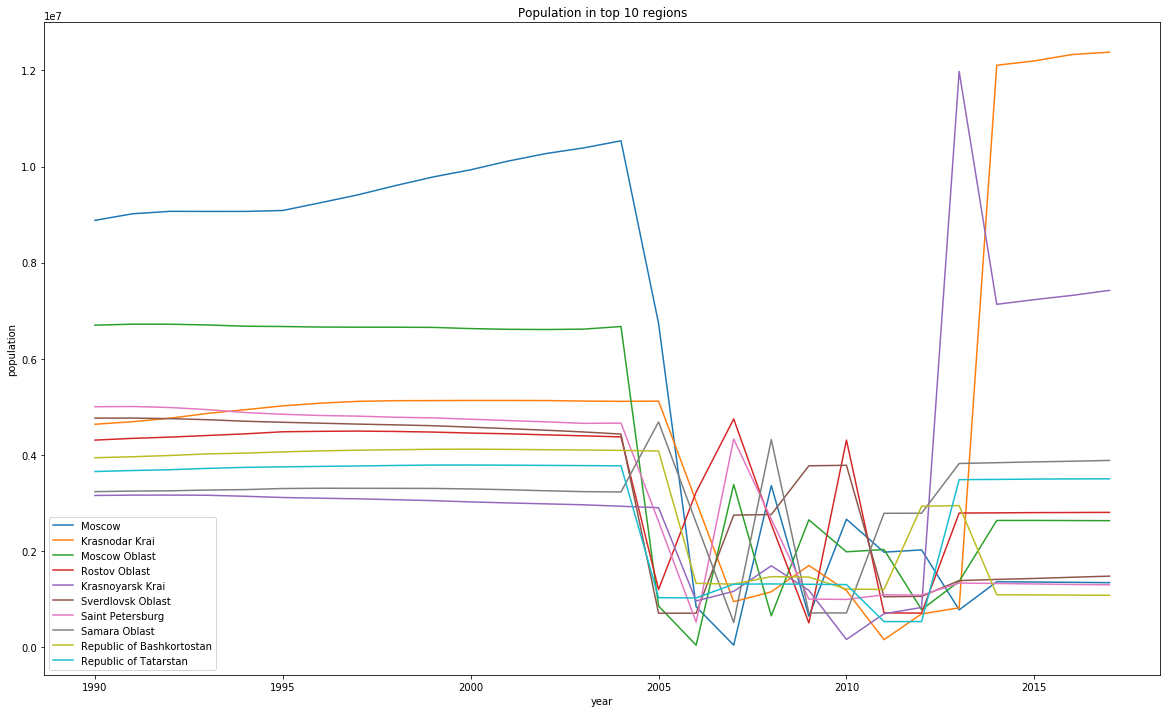

In [18]:
#https://seaborn.pydata.org/generated/seaborn.lineplot.html - this link is for lineplot.
import seaborn as sns
plt.figure(figsize=(20,12))
for x in arraytop10regionpopulation:
    sns.lineplot((readfile_df.groupby('region').get_group(x)['year']),
                 (readfile_df.groupby('region').get_group(x)['population']),label=x)

plt.legend(loc='lower left')
plt.title("Population in top 10 regions")

# Saves an image of our chart so that we can view it in a folder
plt.savefig("russiandemography/top10regionpopulation.png")
plt.show()



In [19]:
# Based on the above graph the population in the top 10 cities starts to decline in 2005 and gets its peak sometime around 2008
#and gets down in 2011 and starts its peak sometime in 2014. after 2015 the rate is steady.
#Moscow being the captial continues the population growth but the decline happens after 2005 and has not increased in great number
#after that. But Krasnoyarsk Krai sees the population growth peak after 2010. This could be because of migration.
# the comparison of moscow with krasnoyarsk krai region based on migration growth would give us more info. 

In [20]:
# get the death rate range in top 10 regions 
top10deathrateregion = readfile_df.groupby('region').agg({'death_rate': 'sum'}).sort_values(by="death_rate",ascending=False)[:10]
arraytop10deathrateregion = top10deathrateregion.index.values
arraytop10deathrateregion

array(['Pskov Oblast', 'Tver Oblast', 'Novgorod Oblast', 'Tula Oblast',
       'Ivanovo Oblast', 'Smolensk Oblast', 'Ryazan Oblast',
       'Kostroma Oblast', 'Kursk Oblast', 'Tambov Oblast'], dtype=object)

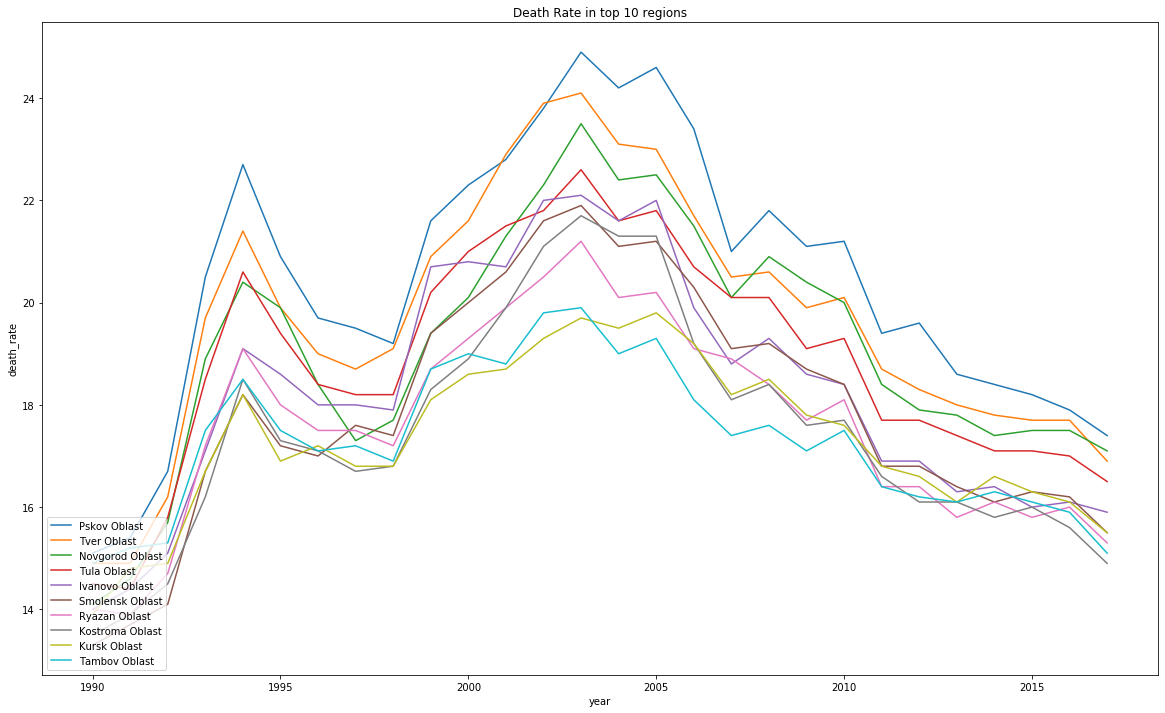

In [21]:
#https://seaborn.pydata.org/generated/seaborn.lineplot.html - this link is for lineplot.
import seaborn as sns
plt.figure(figsize=(20,12))
for x in arraytop10deathrateregion:
    sns.lineplot((readfile_df.groupby('region').get_group(x)['year']),
                 (readfile_df.groupby('region').get_group(x)['death_rate']),label=x)

plt.legend(loc='lower left')
plt.title("Death Rate in top 10 regions")

# Saves an image of our chart so that we can view it in a folder
plt.savefig("russiandemography/top10deathrateregion.png")
plt.show()

In [22]:
# Based on the above graph the region Pskov Oblast has the highest death rate and it started to decline after 2015.

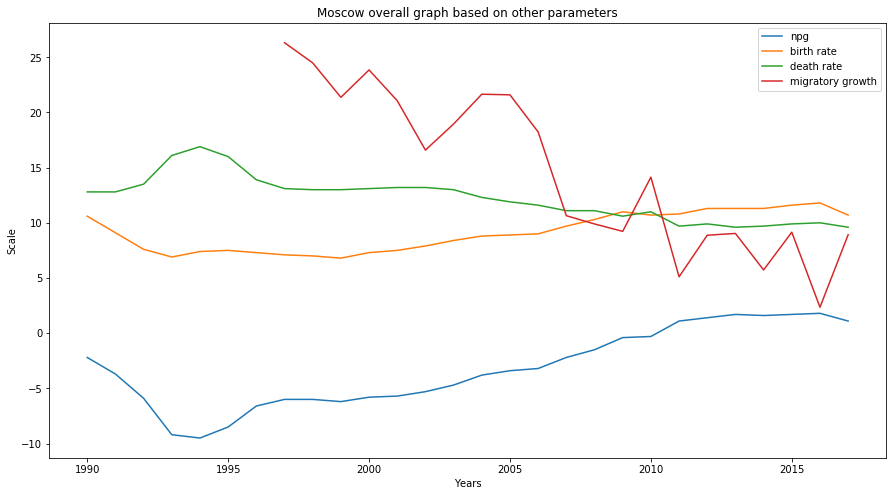

In [23]:
# moscow overall performance over these years
moscow = readfile_df.groupby('region').get_group('Moscow')
plt.figure(figsize=(15,8))
sns.lineplot(moscow['year'], moscow['npg'], label="npg")
sns.lineplot(moscow['year'], moscow['birth_rate'], label="birth rate")
sns.lineplot(moscow['year'], moscow['death_rate'], label="death rate")
sns.lineplot(moscow['year'], moscow['migratory_growth'], label="migratory growth")
plt.title('Moscow overall graph based on other parameters')
plt.xlabel("Years")
plt.ylabel("Scale")
plt.legend(loc='upper right')

In [24]:
#based on the above graph the migratory growth is at peak which matches population chart,
#birth rate has been steady, the npg has been rising since 2005 and continues to be steady after 2010. 

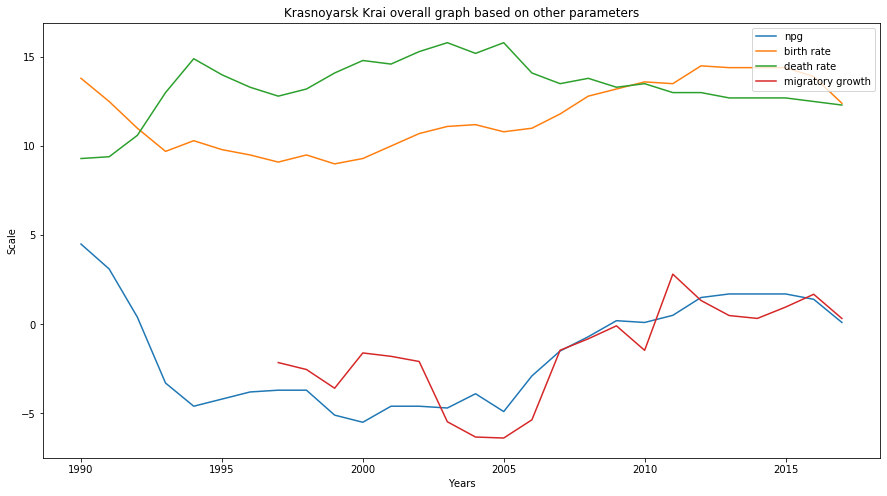

In [25]:
# Krasnoyarsk Krai overall performance over these years
Krasnoyarsk_Krai = readfile_df.groupby('region').get_group('Krasnoyarsk Krai')
plt.figure(figsize=(15,8))
sns.lineplot(Krasnoyarsk_Krai['year'], Krasnoyarsk_Krai['npg'], label="npg")
sns.lineplot(Krasnoyarsk_Krai['year'], Krasnoyarsk_Krai['birth_rate'], label="birth rate")
sns.lineplot(Krasnoyarsk_Krai['year'], Krasnoyarsk_Krai['death_rate'], label="death rate")
sns.lineplot(Krasnoyarsk_Krai['year'], Krasnoyarsk_Krai['migratory_growth'], label="migratory growth")
plt.title('Krasnoyarsk Krai overall graph based on other parameters')
plt.xlabel("Years")
plt.ylabel("Scale")
plt.legend(loc='upper right')
plt.show()

In [26]:
# Krasnoyarsk_Krai has seen a npg growth spurt after 2005 and has been on the upper hand after that.
# the birth rate has always been higher compared to moscow during the npg spurt
# the death rate seems to be same as that of moscow
# migratory growth of moscow starts to decrease in 2005 where as Krasnoyarsk_Krai showed increase.
# this could be the reason for the population peak after 2010. 

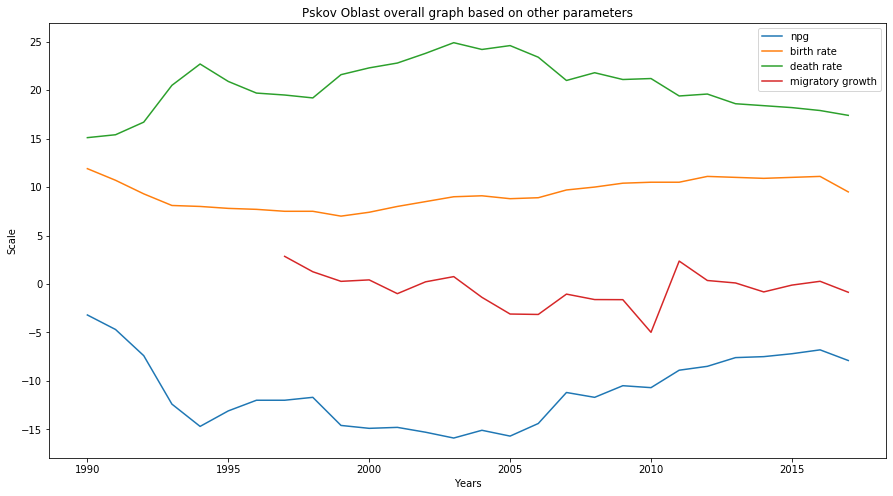

In [27]:
# Pskov Oblast overall performance over these years
Pskov_Oblast = readfile_df.groupby('region').get_group('Pskov Oblast')
plt.figure(figsize=(15,8))
sns.lineplot(Pskov_Oblast['year'], Pskov_Oblast['npg'], label="npg")
sns.lineplot(Pskov_Oblast['year'], Pskov_Oblast['birth_rate'], label="birth rate")
sns.lineplot(Pskov_Oblast['year'], Pskov_Oblast['death_rate'], label="death rate")
sns.lineplot(Pskov_Oblast['year'], Pskov_Oblast['migratory_growth'], label="migratory growth")
plt.title('Pskov Oblast overall graph based on other parameters')
plt.xlabel("Years")
plt.ylabel("Scale")
plt.legend(loc='upper right')
plt.show()

In [28]:
# Based on the above graph Pskov Oblast has the highest death rate. Not many people are migrating to this region
# and the npg has hit sub zero and did not see any rise. 

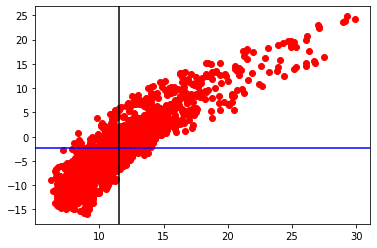

In [29]:
# Scatter plot analysis of birthrate and npgmean
plt.scatter(readfile_df.birth_rate,readfile_df.npg, color="red")
birthratemean = readfile_df.birth_rate.mean()
npgmean = readfile_df.npg.mean()
plt.axvline(birthratemean,color='black')
plt.axhline(npgmean,color='blue')
plt.show()

In [30]:
#mean birth rate
birthratemean = readfile_df.birth_rate.mean()
birthratemean

11.549244712990912

In [31]:
#npgmean
npgmean = readfile_df.npg.mean()
npgmean

-2.344022442813979

In [32]:
deathratemean = readfile_df.death_rate.mean()
deathratemean

13.901382289416865

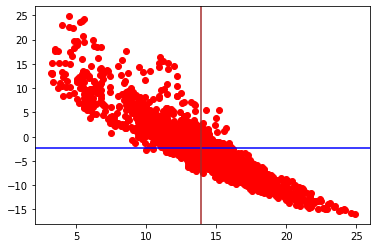

In [33]:
# Scatter plot analysis of death rate and npgmean
plt.scatter(readfile_df.death_rate,readfile_df.npg, color="red")
deathratemean = readfile_df.death_rate.mean()
npgmean = readfile_df.npg.mean()
plt.axhline(npgmean,color='blue')
plt.axvline(deathratemean,color='brown')
plt.show()

In [34]:
# get correlation
readfile_df.corr(method ='pearson')

# Findings:the birthrate mean and npg shows positive results where as the scatter plot for deathrate and npg
#shows negative result

,year,npg,birth_rate,death_rate,migratory_growth,population,difference
year,1.000000,0.109590,0.266583,0.057290,0.026290,-0.014875,0.109122
npg,0.109590,1.000000,0.891493,-0.906698,-0.084960,-0.155498,0.999767
birth_rate,0.266583,0.891493,1.000000,-0.618059,-0.059793,-0.176049,0.890935
death_rate,0.057290,-0.906698,-0.618059,1.000000,0.082543,0.106044,-0.907658
migratory_growth,0.026290,-0.084960,-0.059793,0.082543,1.000000,0.145037,-0.079531
population,-0.014875,-0.155498,-0.176049,0.106044,0.145037,1.000000,-0.155119
difference,0.109122,0.999767,0.890935,-0.907658,-0.079531,-0.155119,1.000000


In [36]:
# lets use another method
readfile_df.corr(method ='kendall')

,year,npg,birth_rate,death_rate,migratory_growth,population,difference
year,1.000000,0.091750,0.251072,0.042229,-0.033287,-0.038733,0.091188
npg,0.091750,1.000000,0.693693,-0.745243,-0.157328,-0.153990,0.991689
birth_rate,0.251072,0.693693,1.000000,-0.433214,-0.170461,-0.167278,0.690625
death_rate,0.042229,-0.745243,-0.433214,1.000000,0.093301,0.105004,-0.747466
migratory_growth,-0.033287,-0.157328,-0.170461,0.093301,1.000000,0.126639,-0.150558
population,-0.038733,-0.153990,-0.167278,0.105004,0.126639,1.000000,-0.153766
difference,0.091188,0.991689,0.690625,-0.747466,-0.150558,-0.153766,1.000000


In [ ]:
# the different methods of correlation produces different result values but overall birth rate and npg shows positive whereas
#death rate and npg is negative.